<a href="https://colab.research.google.com/github/SoniaPMi/Master-IA/blob/main/ejercicio_RX_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential, load_model, Model
from keras.layers import (Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation,
                          BatchNormalization, GlobalAveragePooling2D)
from keras import backend as K
from keras import regularizers
from keras import optimizers
from keras.callbacks import ModelCheckpoint

from IPython.display import SVG, clear_output
from keras.utils.vis_utils import model_to_dot

from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.metrics import classification_report, roc_curve, auc

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from glob import glob

%matplotlib inline

In [2]:
from google_drive_downloader import GoogleDriveDownloader as gdd
gdd.download_file_from_google_drive(file_id='1--9tDZkSPigV9MN7mfc3c-5X7CVgIfTl',
                                    dest_path='./RXs.zip', unzip=True)

Unzipping...Done.


In [3]:
!mv Kermanyetal_trainval_test RXs

In [4]:
!ls

RXs  RXs.zip  sample_data


In [5]:
!ls RXs

test  train_val


In [6]:
!ls RXs/train_val

normal	pneumonia


In [7]:
!ls RXs/train_val/normal

IM-0115-0001.jpeg		NORMAL2-IM-0482-0001.jpeg
IM-0117-0001.jpeg		NORMAL2-IM-0485-0001.jpeg
IM-0119-0001.jpeg		NORMAL2-IM-0486-0001.jpeg
IM-0122-0001.jpeg		NORMAL2-IM-0487-0001.jpeg
IM-0125-0001.jpeg		NORMAL2-IM-0488-0001.jpeg
IM-0127-0001.jpeg		NORMAL2-IM-0489-0001.jpeg
IM-0128-0001.jpeg		NORMAL2-IM-0490-0001.jpeg
IM-0129-0001.jpeg		NORMAL2-IM-0491-0001.jpeg
IM-0131-0001.jpeg		NORMAL2-IM-0493-0001.jpeg
IM-0133-0001.jpeg		NORMAL2-IM-0496-0001.jpeg
IM-0135-0001.jpeg		NORMAL2-IM-0497-0001.jpeg
IM-0137-0001.jpeg		NORMAL2-IM-0499-0001.jpeg
IM-0140-0001.jpeg		NORMAL2-IM-0500-0001.jpeg
IM-0141-0001.jpeg		NORMAL2-IM-0501-0001.jpeg
IM-0143-0001.jpeg		NORMAL2-IM-0502-0001.jpeg
IM-0145-0001.jpeg		NORMAL2-IM-0503-0001.jpeg
IM-0147-0001.jpeg		NORMAL2-IM-0506-0001.jpeg
IM-0149-0001.jpeg		NORMAL2-IM-0507-0001.jpeg
IM-0151-0001.jpeg		NORMAL2-IM-0508-0001.jpeg
IM-0152-0001.jpeg		NORMAL2-IM-0509-0001.jpeg
IM-0154-0001.jpeg		NORMAL2-IM-0511-0001.jpeg
IM-0156-0001.jpeg		NORMAL2-IM-0512-0001.jpeg
IM-0158-00

In [8]:
!ls RXs/train_val/pneumonia

person1000_bacteria_2931.jpeg  person30_bacteria_145.jpeg
person1000_virus_1681.jpeg     person30_bacteria_146.jpeg
person1001_bacteria_2932.jpeg  person30_bacteria_147.jpeg
person1002_bacteria_2933.jpeg  person30_bacteria_148.jpeg
person1003_bacteria_2934.jpeg  person30_bacteria_149.jpeg
person1003_virus_1685.jpeg     person30_bacteria_150.jpeg
person1004_bacteria_2935.jpeg  person30_bacteria_151.jpeg
person1004_virus_1686.jpeg     person30_bacteria_152.jpeg
person1005_bacteria_2936.jpeg  person30_bacteria_153.jpeg
person1005_virus_1688.jpeg     person30_bacteria_154.jpeg
person1006_bacteria_2937.jpeg  person30_bacteria_155.jpeg
person1007_bacteria_2938.jpeg  person30_bacteria_156.jpeg
person1007_virus_1690.jpeg     person30_bacteria_157.jpeg
person1008_bacteria_2939.jpeg  person30_bacteria_158.jpeg
person1008_virus_1691.jpeg     person310_bacteria_1450.jpeg
person1009_virus_1694.jpeg     person310_bacteria_1451.jpeg
person100_virus_184.jpeg       person310_virus_633.jpeg
person1010_b

In [9]:
aux1 = "./RXs/train_val/normal/*"
aux2 = "./RXs/train_val/pneumonia/*"

ficheros_trainval_NORMAL    = glob(aux1)
ficheros_trainval_PNEUMONIA = glob(aux2)
ficheros_trainval = ficheros_trainval_NORMAL + ficheros_trainval_PNEUMONIA
y_trainval = len(ficheros_trainval_NORMAL)*["normal"] + len(ficheros_trainval_PNEUMONIA)*["pneumonia"]

aux1 = "./RXs/test/normal/*"
aux2 = "./RXs/test/pneumonia/*"
ficheros_test_NORMAL    = glob(aux1)
ficheros_test_PNEUMONIA = glob(aux2)
ficheros_test = ficheros_test_NORMAL + ficheros_test_PNEUMONIA
y_test = len(ficheros_test_NORMAL)*["normal"] + len(ficheros_test_PNEUMONIA)*["pneumonia"]

In [10]:
df_trainval = pd.DataFrame({"filepath":ficheros_trainval, "class":y_trainval})
df_test     = pd.DataFrame({"filepath":ficheros_test, "class":y_test})
df_trainval

filepath      class
0      ./RXs/train_val/normal/NORMAL2-IM-1288-0001.jpeg     normal
1      ./RXs/train_val/normal/NORMAL2-IM-0954-0001.jpeg     normal
2      ./RXs/train_val/normal/NORMAL2-IM-0599-0001.jpeg     normal
3     ./RXs/train_val/normal/NORMAL2-IM-1258-0001-00...     normal
4      ./RXs/train_val/normal/NORMAL2-IM-1345-0001.jpeg     normal
...                                                 ...        ...
5227  ./RXs/train_val/pneumonia/person510_virus_1026...  pneumonia
5228  ./RXs/train_val/pneumonia/person1426_bacteria_...  pneumonia
5229  ./RXs/train_val/pneumonia/person1615_bacteria_...  pneumonia
5230  ./RXs/train_val/pneumonia/person538_bacteria_2...  pneumonia
5231  ./RXs/train_val/pneumonia/person480_bacteria_2...  pneumonia

[5232 rows x 2 columns]

In [11]:
df_test

filepath      class
0         ./RXs/test/normal/NORMAL2-IM-0343-0001.jpeg     normal
1         ./RXs/test/normal/NORMAL2-IM-0256-0001.jpeg     normal
2         ./RXs/test/normal/NORMAL2-IM-0317-0001.jpeg     normal
3         ./RXs/test/normal/NORMAL2-IM-0283-0001.jpeg     normal
4         ./RXs/test/normal/NORMAL2-IM-0033-0001.jpeg     normal
..                                                ...        ...
619  ./RXs/test/pneumonia/person138_bacteria_658.jpeg  pneumonia
620  ./RXs/test/pneumonia/person103_bacteria_490.jpeg  pneumonia
621       ./RXs/test/pneumonia/person47_virus_99.jpeg  pneumonia
622  ./RXs/test/pneumonia/person134_bacteria_641.jpeg  pneumonia
623  ./RXs/test/pneumonia/person130_bacteria_625.jpeg  pneumonia

[624 rows x 2 columns]

In [12]:
from sklearn.model_selection import train_test_split

df_train, df_val = train_test_split(df_trainval, test_size=0.1, random_state=0,
                                    stratify=df_trainval["class"])

In [13]:
len(df_train), len(df_val), len(df_test)

(4708, 524, 624)

(1570, 1499)


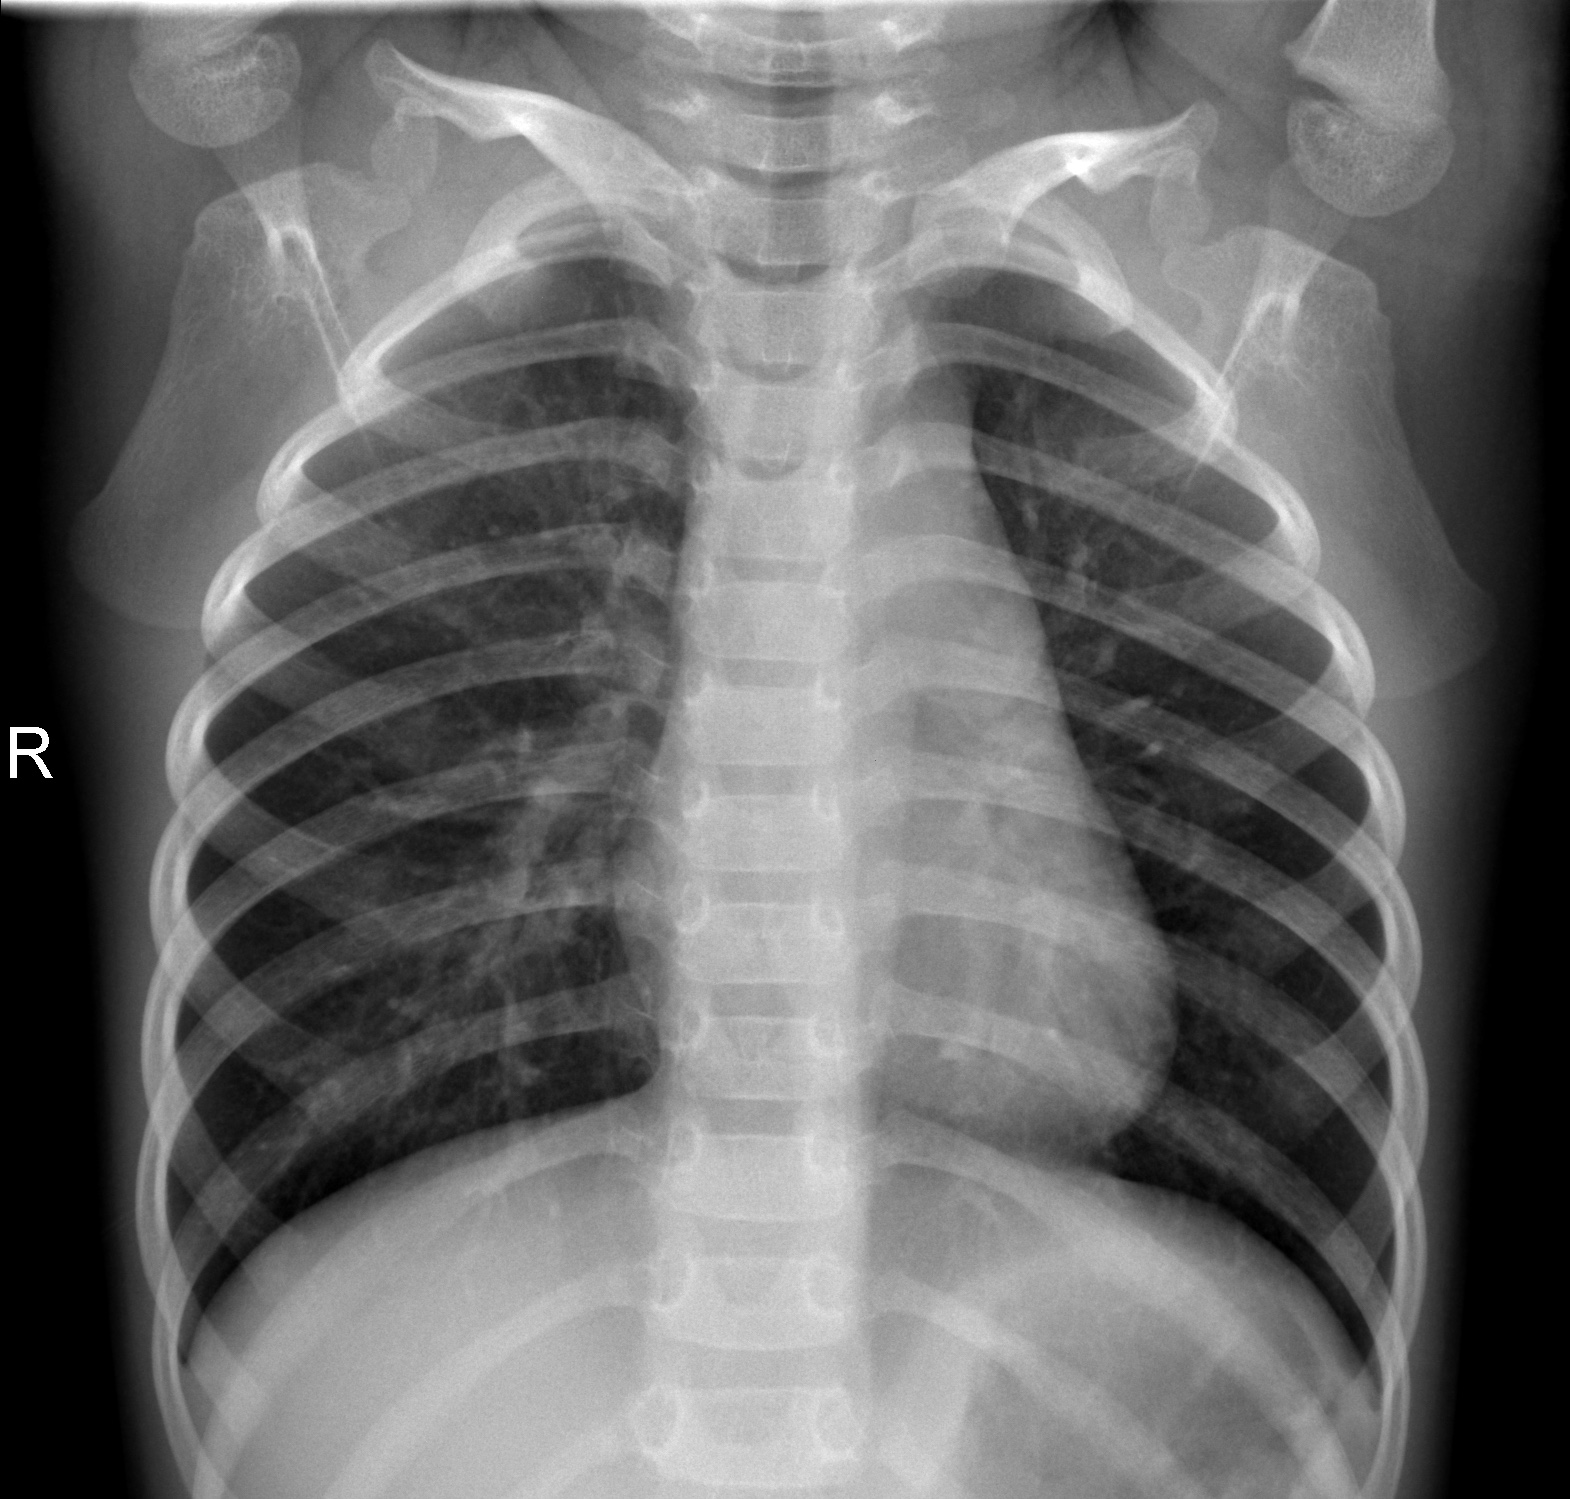

In [14]:
imagen = load_img(ficheros_trainval[1])
print(imagen.size)
imagen

In [16]:
aux = np.array(imagen)
aux.shape #al pasarlo a jpg, a pegar de ser gris, es rgb (R=G=B)

(1499, 1570, 3)

In [17]:
def preprocesado(x):
    # cambio axis=2 por axis=-1, ya que cuando keras llame a esta función no va a introducir
    # una sola imagen sino varias, por lo que va a haber 4 índices:
    # n ejemplos x n filas en imagen x n columnas en imagen x n canales color (3)
    # el -1 indica "último índice"
    return np.expand_dims(np.mean(x, axis=-1), -1) / 255

In [18]:
preprocesado(aux).shape

(1499, 1570, 1)

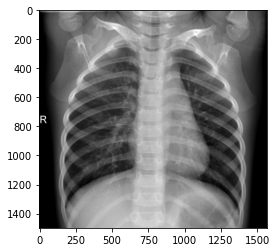

In [19]:
plt.imshow(preprocesado(aux)[:,:,0], cmap="gray");

In [20]:
df_train.iloc[3]

filepath    ./RXs/train_val/normal/NORMAL2-IM-0526-0001.jpeg
class                                                 normal
Name: 829, dtype: object

filepath    ./RXs/train_val/pneumonia/person1067_bacteria_...
class                                               pneumonia
Name: 2543, dtype: object


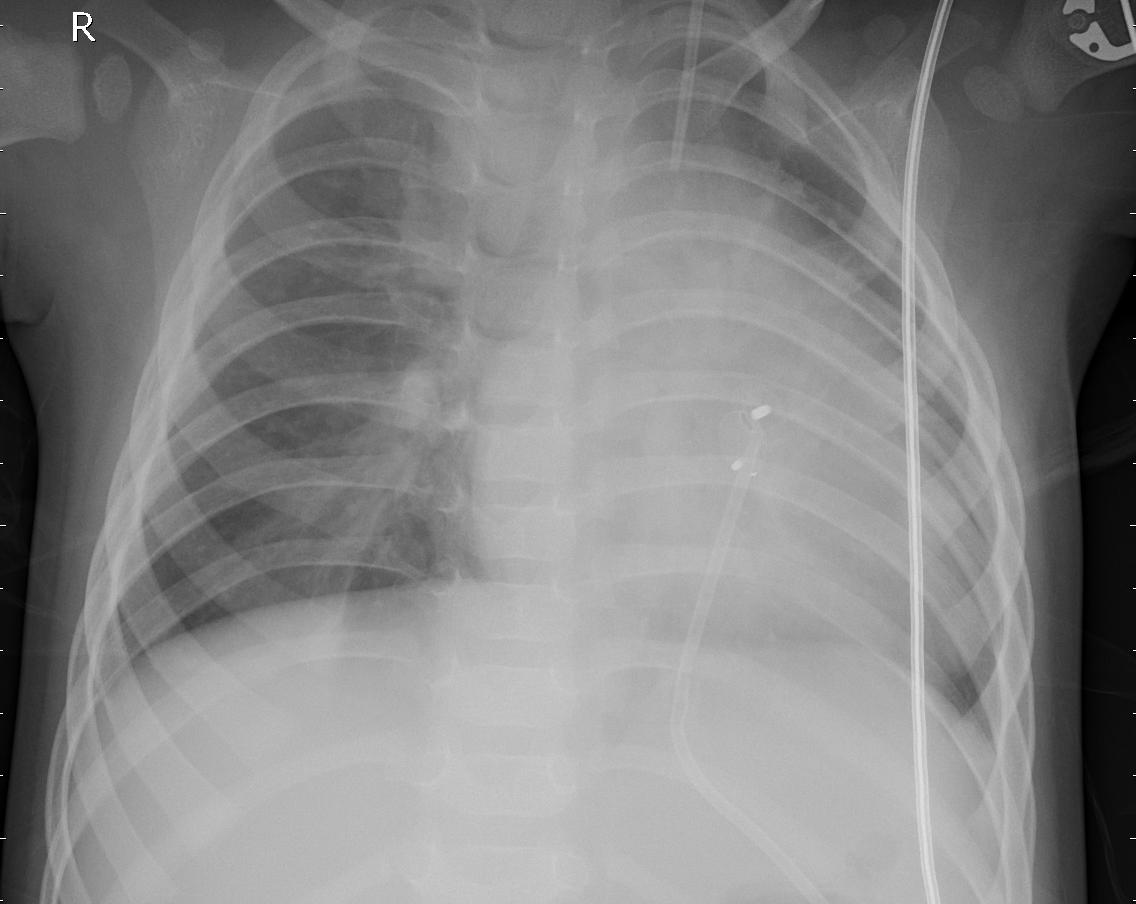

In [21]:
fich = df_train.iloc[0]["filepath"]
print(df_train.iloc[0])
imagen = load_img(fich)
display(imagen)

filepath    ./RXs/train_val/normal/NORMAL2-IM-0526-0001.jpeg
class                                                 normal
Name: 829, dtype: object


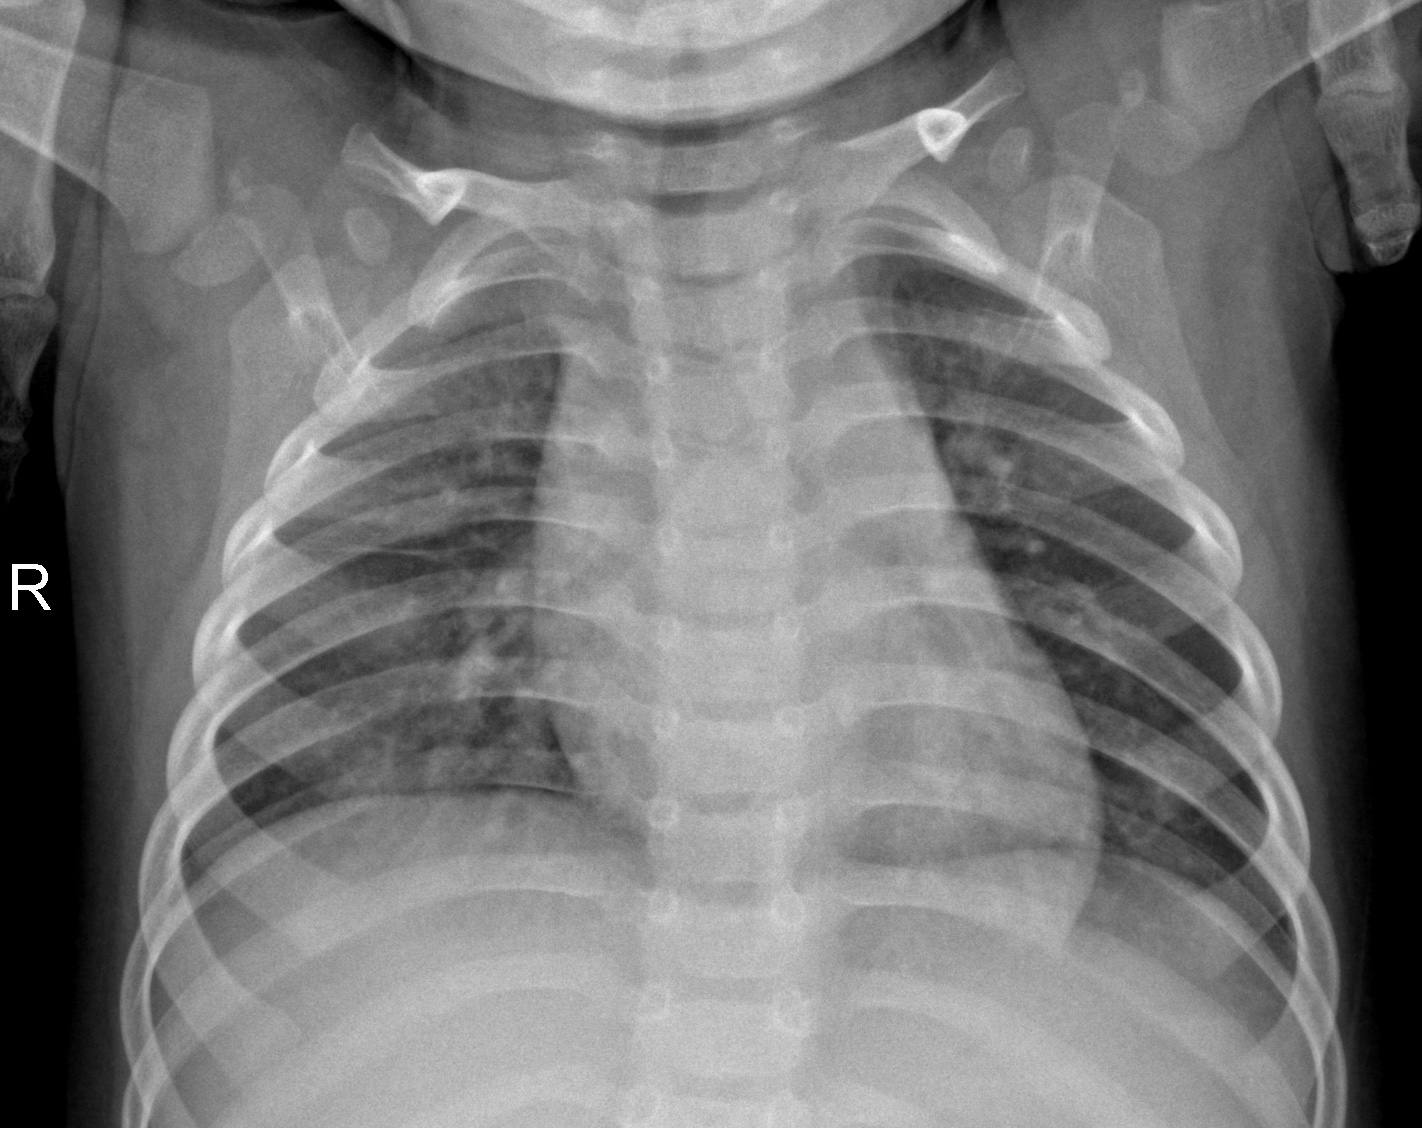

In [22]:
fich = df_train.iloc[3]["filepath"]
print(df_train.iloc[3])
imagen = load_img(fich)
display(imagen)

In [23]:
df_train["class"].value_counts() / len(df_train)

pneumonia    0.742141
normal       0.257859
Name: class, dtype: float64

In [24]:
df_val["class"].value_counts() / len(df_val)

pneumonia    0.742366
normal       0.257634
Name: class, dtype: float64

In [25]:
df_test["class"].value_counts() / len(df_test)

pneumonia    0.625
normal       0.375
Name: class, dtype: float64

In [26]:
normed_dims = (150,150)
batch_size = 32

In [27]:
train_datagen = ImageDataGenerator(
    dtype='float32',
    preprocessing_function = preprocesado,
    rotation_range=5,
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode='constant',
    shear_range=0.1,
    zoom_range=0.2)

val_datagen  = ImageDataGenerator(dtype='float32',
                                  preprocessing_function = preprocesado)

test_datagen = ImageDataGenerator(dtype='float32',
                                  preprocessing_function = preprocesado)

In [48]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe=df_train,
    x_col = "filepath",
    y_col = "class",
    target_size=normed_dims,
    batch_size=batch_size,
    shuffle=True,
    color_mode="grayscale",
    class_mode='categorical')

validation_generator = val_datagen.flow_from_dataframe(
    dataframe=df_val,
    x_col = "filepath",
    y_col = "class",
    target_size=normed_dims,
    batch_size=batch_size,
    shuffle=False,
    color_mode="grayscale",
    class_mode='categorical')

test_generator = test_datagen.flow_from_dataframe(
    dataframe=df_test,
    x_col = "filepath",
    y_col = "class",
    target_size=normed_dims,
    batch_size=batch_size,
    shuffle=False,
    color_mode="grayscale",
    class_mode='categorical')

Found 4708 validated image filenames belonging to 2 classes.
Found 524 validated image filenames belonging to 2 classes.
Found 624 validated image filenames belonging to 2 classes.


In [49]:
from keras.regularizers import l1, l2

In [55]:
# Rellenar:
rate = 0.
input_shape = normed_dims + (1,)

#optimizer = "sgd"  # más fino, más lento
#optimizer = "adam" # muy rápido, eso lo hace a veces inestable
optimizer = "rmsprop" # bueno en general


model = Sequential()
#model.add(BatchNormalization(input_shape=input_shape))
model.add(Dropout(rate=rate, input_shape=input_shape))
model.add(Conv2D(filters=16, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D())
#model.add(Dropout(rate=rate))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D())
#model.add(Dropout(rate=rate))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D())
#model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dropout(rate=rate))
model.add(Dense(5, activation='relu', kernel_regularizer=l2(0.1)))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer=optimizer, loss='categorical_crossentropy',
              metrics=["accuracy"])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_12 (Dropout)        (None, 150, 150, 1)       0         
                                                                 
 conv2d_24 (Conv2D)          (None, 146, 146, 16)      416       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 73, 73, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 69, 69, 32)        12832     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 34, 34, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 30, 30, 32)       

In [56]:
from matplotlib.ticker import MaxNLocator

def grafica_entrenamiento(tr_acc, val_acc, tr_loss, val_loss, best_i,
                          figsize=(10,4)):
    plt.figure(figsize=figsize)
    ax = plt.subplot(1,2,1)
    plt.plot(1+np.arange(len(tr_acc)),  100*np.array(tr_acc))
    plt.plot(1+np.arange(len(val_acc)), 100*np.array(val_acc))
    plt.plot(1+best_i, 100*val_acc[best_i], 'or')
    plt.title('tasa de acierto del modelo (%)', fontsize=18)
    plt.ylabel('tasa de acierto (%)', fontsize=18)
    plt.xlabel('época', fontsize=18)
    plt.legend(['entrenamiento', 'validación'], loc='upper left')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    plt.subplot(1,2,2)
    plt.plot(1+np.arange(len(tr_acc)), np.array(tr_loss))
    plt.plot(1+np.arange(len(val_acc)), np.array(val_loss))
    plt.plot(1+best_i, val_loss[best_i], 'or')
    plt.title('loss del modelo', fontsize=18)
    plt.ylabel('loss', fontsize=18)
    plt.xlabel('época', fontsize=18)
    plt.legend(['entrenamiento', 'validación'], loc='upper left')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.show()

In [57]:
acum_tr_acc = []
acum_val_acc = []
best_val_acc = -1000
acum_tr_loss  = []
acum_val_loss = []

In [58]:
number_train_samples = train_generator.n
number_val_samples   = validation_generator.n
number_test_samples  = test_generator.n

number_train_samples, number_val_samples, number_test_samples

(4708, 524, 624)

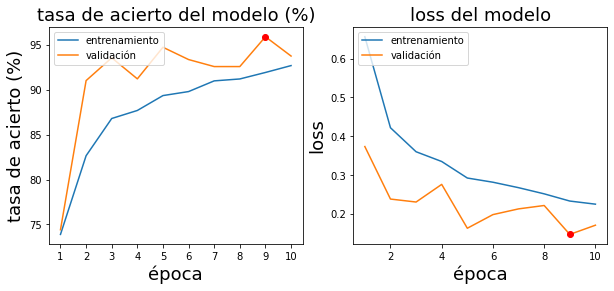

 17/147 [==>...........................] - ETA: 47s - loss: 0.1769 - accuracy: 0.9540

KeyboardInterrupt: ignored

In [59]:
epochs = 50

modelpath="model_current_best_parte3.h5"

checkpoint = ModelCheckpoint(modelpath, monitor='val_accuracy', verbose=1,
                             save_best_only=True,
                             mode='max') # graba sólo los que mejoran en validación
callbacks_list = [checkpoint]
for e in range(epochs):
    history = model.fit(train_generator, 
                        steps_per_epoch=number_train_samples // batch_size,
                        epochs=1,
                        callbacks=callbacks_list,
                        verbose=1,
                        shuffle = False,
                        validation_data=validation_generator,
                        validation_steps=number_val_samples // batch_size
                       )
    
    if history.history['val_accuracy'][-1] > best_val_acc:
        print("Validation accuracy improved from",
            best_val_acc, 'to', history.history['val_accuracy'])
        print("saving weights")
        best_val_acc = history.history['val_accuracy'][-1]
    
    acum_tr_acc.append(history.history['accuracy'][0])
    acum_val_acc.append(history.history['val_accuracy'][0])
    acum_tr_loss.append(history.history['loss'][0])
    acum_val_loss.append(history.history['val_loss'][0])
    
    if len(acum_tr_acc) > 1:
        clear_output()
        best_i = np.argmax(acum_val_acc)
        grafica_entrenamiento(acum_tr_acc, acum_val_acc, acum_tr_loss, acum_val_loss, best_i)

In [60]:
model = load_model(modelpath)

In [61]:
scores_tr = model.evaluate(train_generator)
print('Train loss    :', scores_tr[0])
print('Train accuracy:', scores_tr[1])
print()

scores_val = model.evaluate(validation_generator)
print('Val loss    :', scores_val[0])
print('Val accuracy:', scores_val[1])
print()

scores_te = model.evaluate(test_generator)
print('Test loss     :', scores_te[0])
print('Test accuracy :', scores_te[1])

148/148 [==============================] - 52s 350ms/step - loss: 0.2453 - accuracy: 0.9144
Train loss    : 0.24530047178268433
Train accuracy: 0.9144009947776794

17/17 [==============================] - 5s 311ms/step - loss: 0.1466 - accuracy: 0.9599
Val loss    : 0.14662273228168488
Val accuracy: 0.9599236845970154

20/20 [==============================] - 5s 260ms/step - loss: 0.3786 - accuracy: 0.8526
Test loss     : 0.37862086296081543
Test accuracy : 0.8525640964508057
